### Section 2: Data Handling in Python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.1 Reading in data

In [6]:
# Using the Pandas library to read the .xlsx file as a table (dataframe)

df = pd.read_excel('didi_visualrecon_day0.xlsx', index_col=0)
df = df.iloc[:, 128:]
df

,neuron128,neuron129,neuron130,neuron131,neuron132,neuron133,neuron134,neuron135,neuron136,neuron137,...,neuron246,neuron247,neuron248,neuron249,neuron250,neuron251,neuron252,neuron253,neuron254,neuron255
Accordion,36.857143,3.142857,6.857143,6.000000,50.285714,7.714286,6.000000,29.142857,30.571429,4.571429,...,58.571429,10.000000,21.714286,3.428571,7.714286,26.857143,5.714286,4.000000,21.428571,4.285714
Airplane,49.696970,3.030303,12.121212,6.969697,33.333333,6.060606,6.969697,27.575758,36.060606,4.848485,...,52.424242,8.484848,19.090909,5.151515,4.848485,30.000000,8.787879,2.424242,13.333333,5.454545
Ant,82.812500,3.125000,3.750000,8.437500,62.187500,5.312500,5.312500,35.000000,16.250000,6.562500,...,29.062500,5.937500,10.000000,4.062500,5.625000,33.437500,15.625000,2.187500,7.812500,5.000000
Antelope,62.500000,7.187500,11.250000,12.187500,64.062500,5.312500,4.375000,33.750000,19.375000,4.687500,...,59.375000,10.625000,18.125000,5.937500,6.250000,35.000000,14.375000,5.937500,18.437500,3.750000
Apple,64.705882,2.647059,9.705882,12.058824,66.176471,5.882353,4.411765,28.823529,15.294118,3.823529,...,43.529412,8.529412,10.000000,2.647059,8.235294,29.117647,5.000000,3.529412,8.235294,6.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Water bottle,62.222222,1.944444,11.666667,9.166667,65.555556,3.055556,4.722222,38.611111,13.888889,6.111111,...,53.055556,5.833333,28.055556,4.166667,5.555556,23.055556,12.222222,4.722222,23.333333,3.333333
Vessel,47.142857,3.142857,8.571429,8.285714,24.857143,3.714286,5.428571,28.571429,21.142857,4.285714,...,40.285714,5.714286,14.285714,2.000000,4.285714,9.428571,6.000000,3.428571,8.857143,3.714286
Whale,30.000000,3.125000,10.625000,12.187500,76.250000,5.000000,3.437500,18.437500,40.625000,5.625000,...,29.687500,10.937500,18.437500,2.187500,6.250000,34.687500,7.187500,4.375000,10.000000,5.625000
Wine bottle,87.647059,2.647059,5.000000,6.470588,47.941176,8.235294,2.941176,30.588235,12.647059,3.823529,...,40.000000,8.823529,21.470588,5.000000,11.764706,39.705882,19.117647,5.882353,17.647059,2.941176


#### 2.2 Simple Operations on the data

In [7]:
# find the preferred stimulus (row name) for given neuron
def find_pref_stim(neuronID):
    col_name = 'neuron' + str(neuronID) # converting integer ID into a string for column name
    neuron_rates = df[col_name] # taking the entire row that corresponds to the col_name (a neuron's firing rate for each image)
    max_index = np.argmax(list(neuron_rates)) # maximum index
  
    img_name = list(df.index)[max_index] # img name (row name) assosciated with max index
   
    return img_name

find_pref_stim(129)

'Antelope'

In [9]:
pref_stim_dict = {} #dict with keys of stimuli and values of list of neuron IDs that prefer it
# example: pref_stim_dict = {'airplane':[10, 21], 'dog': [1]}

for neuronID in range(128,256):
    pref_stim = find_pref_stim(neuronID)

    # if image is not a key already (unseen), create a new key and initialise value as the neuron that prefers it
    if pref_stim not in pref_stim_dict:
        pref_stim_dict[pref_stim] = [neuronID]

    # if image already exists as a key (seen before), we just need to append our new preferring neuron ID to the value list
    else:
        pref_stim_dict[pref_stim].append(neuronID)
        
pref_stim_dict

{'Traffic light': [128, 147, 163, 240],
 'Antelope': [129, 149, 189, 216],
 'Porcupine': [130, 233],
 'Horse': [131, 173],
 'Dog': [132, 142, 145, 158, 161, 174, 185, 204, 211, 215, 225],
 'Turtle': [133],
 'Elephant': [134],
 'Hamster': [135, 166, 179],
 'Cockroach': [136],
 'Camel': [137, 154, 255],
 'Microphone': [138],
 'Scorpion': [139, 232],
 'Maraca': [140, 195],
 'Neck brace': [141, 168, 175, 196, 197, 209, 219, 222],
 'Pineapple': [143],
 'Person': [144, 183, 212],
 'Digital clock': [146, 151],
 'Hamburger': [148],
 'Banjo': [150],
 'Rabbit': [152, 155],
 'Koala': [153],
 'Plate rack': [156],
 'Monkey': [157, 171, 184, 188, 191, 200, 202, 203, 214],
 'Bird': [159],
 'Spatula': [160, 170],
 'Starfish': [162, 241],
 'Flute': [164, 187, 198],
 'Syringe': [165],
 'Rugby ball': [167],
 'Cattle': [169],
 'Jellyfish': [172],
 'Burrito': [176],
 'Cauliflower': [177],
 'Bowl': [178],
 'Lamp': [180, 253],
 'Toilet tissue': [181],
 'Domestic cat': [182, 194, 201, 206, 231, 234],
 'Windso

#### 2.3 Bar Plotting

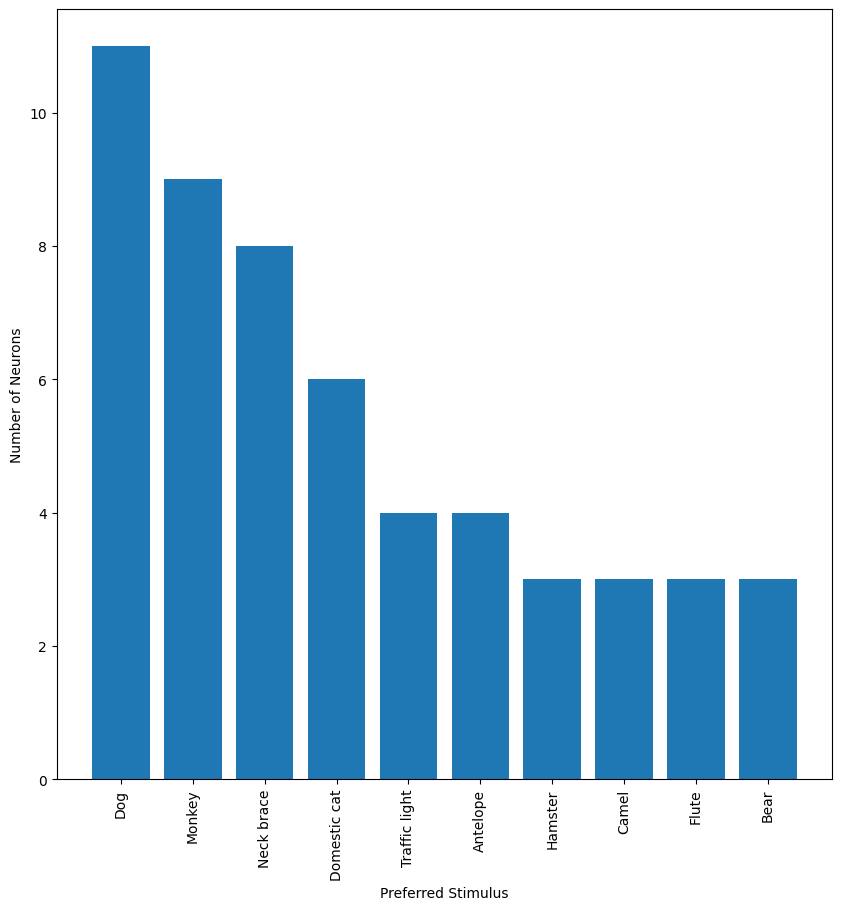

In [73]:
# initialize an empty figure canvas of size 1000px x 1000px using plt (Matplotlib library)
fig = plt.figure(figsize=(10,10))
x = list(pref_stim_dict.keys()) # x values will be the names of images
y = list(pref_stim_dict.values()) 
y = [len(yi) for yi in y] # y values will be the number of neurons that prefer that image (length of neuronlist)


# argsort gives the indicies of the sorted values
sorted_inds = np.argsort(y)[::-1] #[::-1] denotes reverse as we are 'stepping' -1 in each iteration 

# take top 10 sorted values for x and y
x = [x[i] for i in sorted_inds][:10] 
y = [y[i] for i in sorted_inds][:10]

# on the canvas, plot a bar graph
plt.bar(x, y)
plt.xticks(rotation=90)
plt.xlabel('Preferred Stimulus')
plt.ylabel('Number of Neurons')

plt.show()

#### 2.4 Heatmap visualization

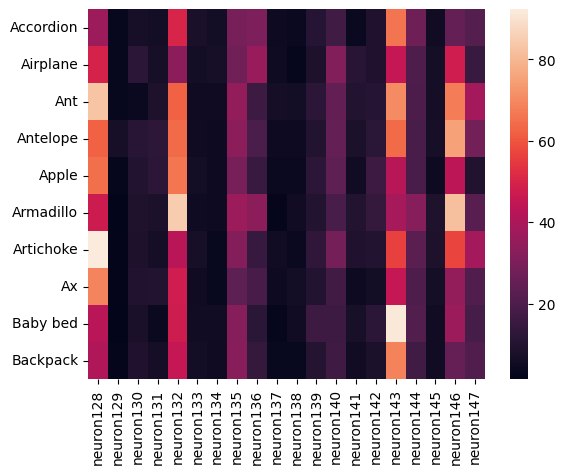

In [10]:
# convert df table to a numpy array
neural_data_arr = df.to_numpy()

# use sns (seaborn) library to create a heatmap of first 10 images and first 20 neurons
sns.heatmap(neural_data_arr[:10,:20], yticklabels=df.index[:10], xticklabels=df.columns[:20])
plt.show()

#### 2.5 Correlations

In [75]:
# find correlation coefficient between two neurons (columns)
def find_neuron_correlation(neuronID1, neuronID2):
    col_name1 = 'neuron' + str(neuronID1)
    col_name2 = 'neuron' + str(neuronID2)
    corr = np.corrcoef(df[col_name1], df[col_name2])[0][1] #np.corrcoef(a,b) returns the coeff matrix so we are interested in the off-diagonal value so [0][1]
    return corr

In [81]:
print(find_neuron_correlation(135, 141))
print(find_neuron_correlation(131, 134))

0.7302784927920959
0.06202038265251861


#### 2.6 Principal Component Analysis

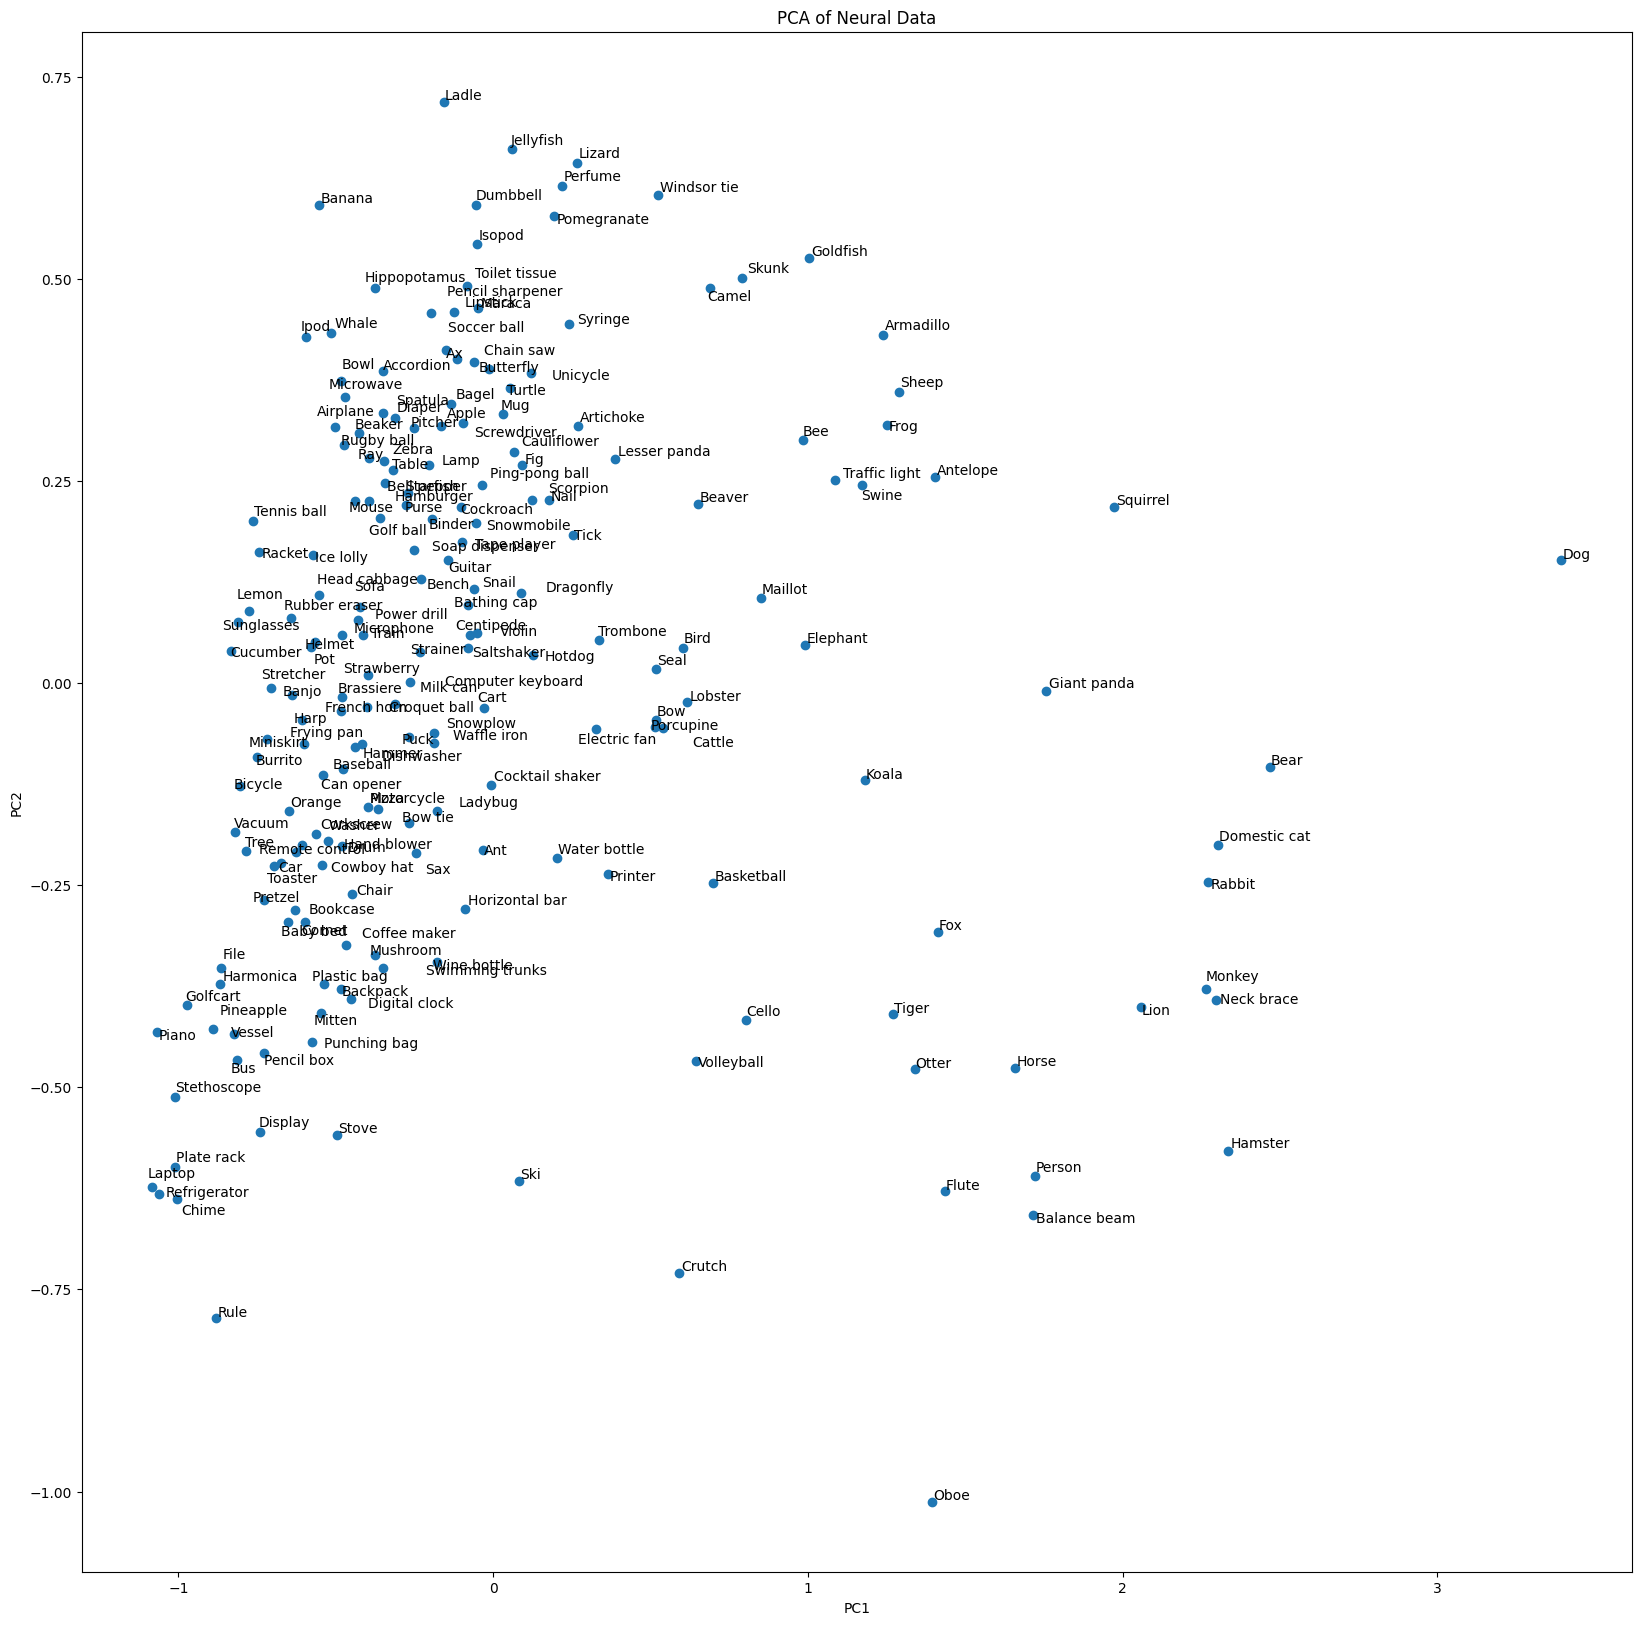

In [83]:
# PCA with scikit-learn library
from sklearn.decomposition import PCA
from adjustText import adjust_text # need to do a pip install first


pca = PCA(n_components=2) # initializes our PCA object
neural_data_pca = pca.fit_transform(neural_data_arr) # computes the PCs and transforms our neural data array into this PC space


plt.figure(figsize=(20,20))
# scatter plot the PC1 and PC2 (col1 and col2)
plt.scatter(neural_data_pca[:,0], neural_data_pca[:,1])

# helper function to clean up the labels 
texts = [plt.text(neural_data_pca[i,0], neural_data_pca[i,1], df.index[i]) for i in range(neural_data_pca.shape[0])]
adjust_text(texts);
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Neural Data')
plt.show()